# Analyse Exploratoire des données

In [1]:
#Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#chemin=r"C:\Users\dell\Documents\Perso\cours_python\Titanic.csv"

In [3]:
#Importation du jeu de données(Dataset)
#df=pd.read_csv(chemin)
#df.head(10)
sns.get_dataset_names()   #lire les dataset dans sns


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#Supprimer les redondances

In [6]:
df=df.drop(['alive','who','embarked','class','deck'], axis=1)

In [7]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [9]:
df.shape

(891, 10)

In [10]:
#Visualistion pour comprendre les données

<p>Analyse univariée</p>

#analyse univariée de la variable catégorielle 'survived': aperçu de la distribution empirique(Diagramme en tuyau d'orgue): Effectifs/Modalités

<AxesSubplot:xlabel='survived', ylabel='count'>

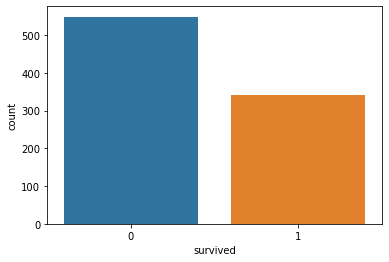

In [11]:
sns.countplot(x='survived', data=df)

#Conclusion: déséquilibre dans les classes(problème fréquent en classification); ceci peut créer des erreurs dans le modèle: à régler

In [12]:
df['survived'].value_counts(normalize=True)   #donnes les pourcentages par class

0    0.616162
1    0.383838
Name: survived, dtype: float64

#conclusion presque 61% d'individu dans la classe 0: l'algorithme aura tendance à prédire la classe 0

#analyse univariée de la variable catégorielle 'pclass': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='pclass', ylabel='count'>

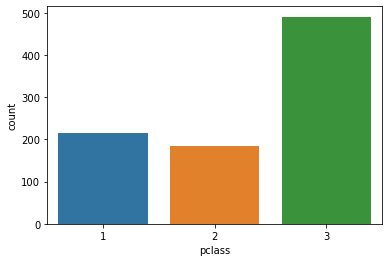

In [13]:
sns.countplot(x='pclass', data=df)

#analyse univariée de la variable catégorielle 'sex': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='sex', ylabel='count'>

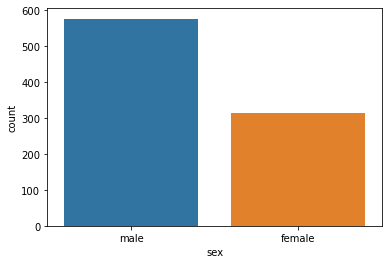

In [14]:
sns.countplot(x='sex', data=df)

#analyse univariée de la variable catégorielle 'sibsp': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

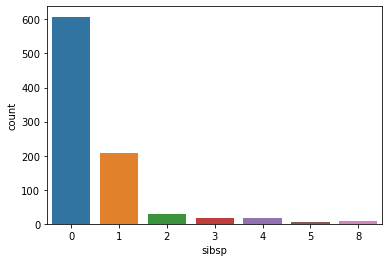

In [15]:
sns.countplot(x='sibsp', data=df)


#analyse univariée de la variable catégorielle 'parch': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='parch', ylabel='count'>

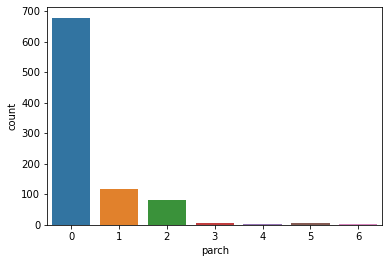

In [16]:
sns.countplot(x='parch', data=df)


#analyse univariée de la variable catégorielle 'adult_male': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='adult_male', ylabel='count'>

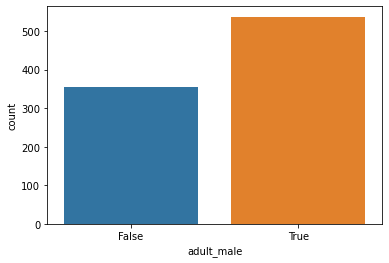

In [17]:
sns.countplot(x='adult_male', data=df)

#analyse univariée de la variable quantitative continue 'fare': aperçu de la distribution empirique(boite à moustache)

<AxesSubplot:ylabel='fare'>

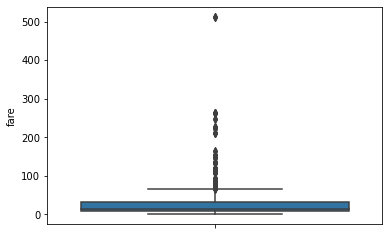

In [18]:
sns.boxplot(y='fare', data=df)

#conclusion: beaucoup de valeurs abérrantes(outlier) ie qui sortent du lot

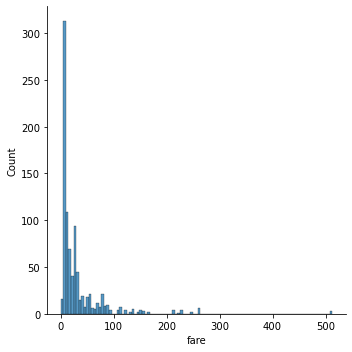

In [19]:
sns.displot(df['fare'], kde=False)

#tableau de contingence pour montrer que les deux variables sex et adult_male sont differentes

In [20]:
pd.crosstab(df['sex'], df['adult_male'])

adult_male,False,True
sex,,
female,314,0
male,40,537


#analyse univariée des variables catégorielles 'embark_town' et 'alone': aperçu de la distribution empirique(Diagramme en tuyau d'orgue)

<AxesSubplot:xlabel='embark_town', ylabel='count'>

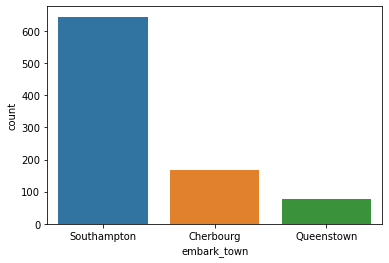

In [21]:
sns.countplot(x='embark_town', data=df)

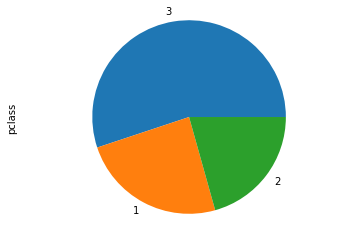

In [22]:
df['pclass'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='alone', ylabel='count'>

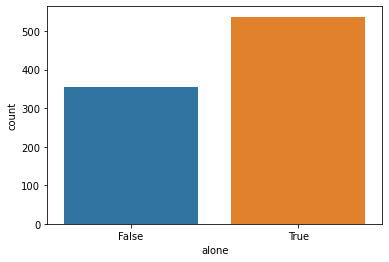

In [23]:
sns.countplot(x='alone', data=df)

#analyse univariée de variable 'age': aperçu de la distribution empirique

<AxesSubplot:ylabel='age'>

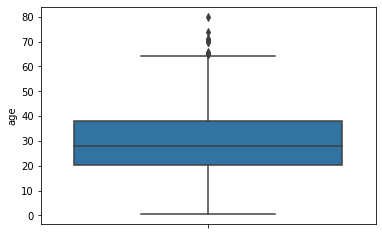

In [24]:
sns.boxplot(y='age', data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


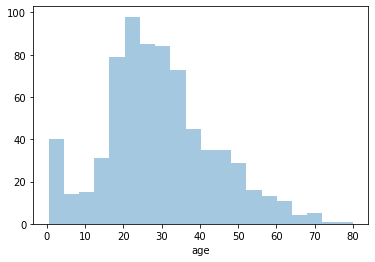

In [25]:
sns.distplot(df['age'], kde=False, bins=20);

#analyse multivariée: trouver les relations entre variables 

<AxesSubplot:xlabel='survived', ylabel='age'>

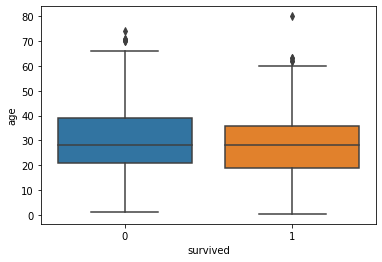

In [26]:
#Relation entre age et variable cible (survived)
sns.boxplot(x='survived',y='age', data=df)

<AxesSubplot:xlabel='survived', ylabel='age'>

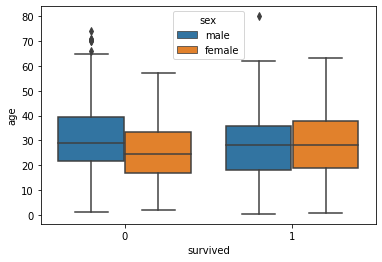

In [27]:
sns.boxplot(x='survived',y='age', hue='sex',data=df)

<AxesSubplot:xlabel='survived', ylabel='fare'>

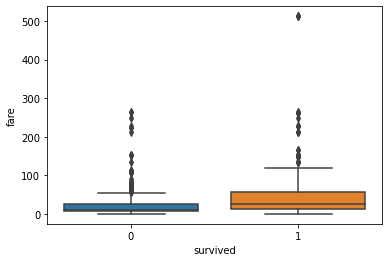

In [28]:
#Relation entre sex et variable cible (survived)
sns.boxplot(x='survived',y='fare',data=df)

<AxesSubplot:xlabel='survived', ylabel='fare'>

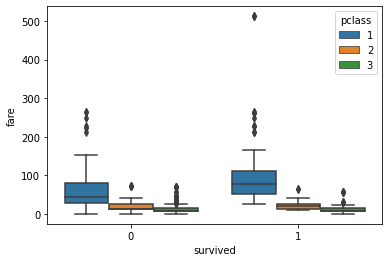

In [29]:
sns.boxplot(x='survived',y='fare', hue='pclass',data=df)

In [30]:
#sns.pairplot(df)

<AxesSubplot:>

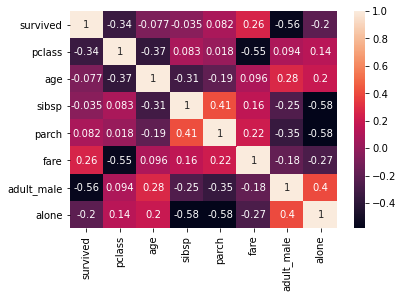

In [31]:
sns.heatmap(df.corr(), annot=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,survived,pclass
survived,1.000000,-0.338481
pclass,-0.338481,1.000000


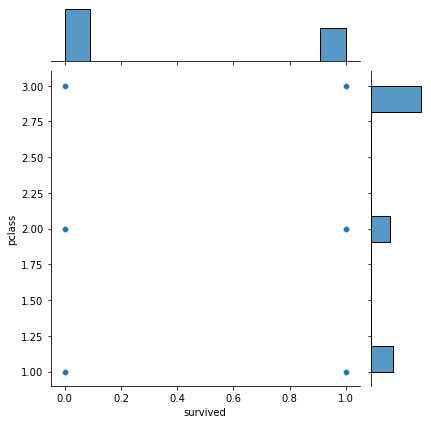

In [32]:
sns.jointplot("survived", "pclass", data=df)
df[["survived", "pclass"]].corr()

In [33]:
#Resumé statistique
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#75% des valeurs de la variable fare sont inférieur à 31

In [34]:
df['fare'].quantile(0.99)   #quantile à 99%, montre la valeur aberrante avec le max qui est de 512

249.00622000000033

# Nettoyage des données

In [35]:
df.isna().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
adult_male      0.000000
embark_town     0.224467
alone           0.000000
dtype: float64

#Gestion valeur manquante numérique: remplacer les valeurs manquantes par la mediane qui est moins sensible aux valeurs abérrantes

In [36]:
df.fillna(value={'age':df['age'].median()}, inplace=True)  #imputation par la médiane: éfficace si ça n'affecte pas la variance: std

In [37]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [38]:
df['age'].std()

13.019696550973194

In [39]:
#Gestion valeur manquante catégorielle:les  remplacer par la modalité la plus fréquente
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [40]:
df.fillna(value={'embark_town':'Southampton'}, inplace=True) 

In [41]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

#Gestion des valeurs abérrantes(éviter les biais dans nos resultats): sous-domaine très importante de la data science; l'identification des valeurs abérrantes permet dans certaine application la détection d'anomalies, de fraudes

#identifier les valeurs abérrantes dans les variables

In [42]:
#valeur<Q1-1,5*IQR ou valeur>Q3+1,5*IQR   avec IQR: Interquartile Range= Q3-Q1

In [43]:
def find_outliers(data, variable_name):
    IQR=data[variable_name].quantile(0.75)-data[variable_name].quantile(0.25)
    lower_born=data[variable_name].quantile(0.25)-1.25*IQR
    upper_born=data[variable_name].quantile(0.75)+1.25*IQR
    return data[(data[variable_name]<lower_born) | (data[variable_name]>upper_born)]

In [44]:
#appliquer la fonction sur notre df
find_outliers(df, 'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
92,0,1,male,46.0,1,0,61.1750,True,Southampton,False
155,0,1,male,51.0,0,1,61.3792,True,Cherbourg,False
54,0,1,male,65.0,0,1,61.9792,True,Cherbourg,False
97,1,1,male,23.0,0,1,63.3583,True,Cherbourg,False
754,1,2,female,48.0,1,2,65.0000,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,True,Southampton,False
88,1,1,female,23.0,3,2,263.0000,False,Southampton,False
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False
258,1,1,female,35.0,0,0,512.3292,False,Cherbourg,True


In [45]:
#remplacer les valeurs aberrantes ou les supprimers: les remplacer par les bornes sup et inf

In [46]:
iqr_fare=df['fare'].quantile(0.75)-df['fare'].quantile(0.25)
df['fare'].quantile(0.75)+1.5*iqr_fare


65.6344

In [47]:
df.loc[(find_outliers(df, 'fare').index, 'fare')]=df['fare'].quantile(0.75)+1.5*iqr_fare

<AxesSubplot:ylabel='fare'>

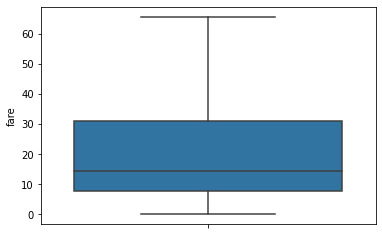

In [48]:
sns.boxplot(y='fare', data=df)

In [49]:
iqr_age=df['age'].quantile(0.75)-df['age'].quantile(0.25)


In [50]:
df['age'].quantile(0.25)-1.5*iqr_age


2.5

In [51]:
df['age'].quantile(0.75)+1.5*iqr_age

54.5

In [52]:
find_outliers(df, 'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [53]:
df.loc[df['age']<df['age'].quantile(0.25)-1.5*iqr_age,'age']=df['age'].quantile(0.25)-1.5*iqr_age

In [54]:
df.loc[df['age']>df['age'].quantile(0.75)+1.5*iqr_age,'age']=df['age'].quantile(0.75)+1.5*iqr_age

<AxesSubplot:ylabel='age'>

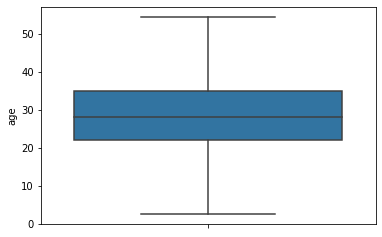

In [55]:
sns.boxplot(y='age', data=df)

In [56]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


# Préparation des Données

In [57]:
#Encoding
df['sex']=df.sex.replace({'female':0, 'male':1})

In [58]:
df.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,True,Southampton,False
1,1,1,0,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,True,Southampton,True


In [59]:
#afficher les modalités de la variable embark_town
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [60]:
df['adult_male']=df.adult_male.astype('int')
df['alone']=df.alone.astype('int')
embark_dummies=pd.get_dummies(df.embark_town, drop_first=True)
embark_dummies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [61]:
df=pd.concat([df, embark_dummies], axis=1)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,Southampton,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,Southampton,1,0,1


In [62]:
del df['embark_town']

In [63]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,1


In [64]:
#Feature Engineering
df['family']=df.sibsp + df.parch

In [65]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,1,0,7.2500,1,0,0,1,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,1,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,0,0,1,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,1,0


In [66]:
df.drop(['sibsp','parch'], axis=1, inplace=True)

In [67]:
df.head(5)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0
3,1,1,0,35.0,53.1000,0,0,0,1,1
4,0,3,1,35.0,8.0500,1,1,0,1,0


In [68]:
X=df.drop(['survived'], axis=1)
Y=df['survived']

In [69]:
#Split des données: train_set, test_set, validation_set
from sklearn.model_selection import train_test_split
seed=111
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.4,
                                                  random_state=seed, stratify=Y)


In [70]:
x_test

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
212,3,1,22.0,7.2500,1,1,0,1,0
507,1,1,28.0,26.5500,1,1,0,1,0
716,1,0,38.0,65.6344,0,1,0,0,0
265,2,1,36.0,10.5000,1,1,0,1,0
195,1,0,54.5,65.6344,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
412,1,0,33.0,65.6344,0,0,1,0,1
99,2,1,34.0,26.0000,1,0,0,1,1
624,3,1,21.0,16.1000,1,1,0,1,0
277,2,1,28.0,0.0000,1,1,0,1,0


In [71]:
x_val, x_test, y_val, y_test=train_test_split(x_test,y_test, test_size=0.5, random_state=seed, stratify=y_test)  #stratify permet de tenir compte du déséquilibre de class: meme distribution sur le val, train et test set


In [72]:
Y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [73]:
y_train.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [74]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [75]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: survived, dtype: float64

In [76]:
#Normaliser les variables age et fare

In [77]:
#Résoudre le problème de déséquilibre: Méthode de sur-échantillonage (upsampling)
from sklearn.utils import resample

In [78]:
X2=x_train
X2['survived']=y_train.values
X2.head(5)

<ipython-input-78-3d0306002842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['survived']=y_train.values


,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
151,1,0,22.0,65.6344,0,0,0,1,1,1
149,2,1,42.0,13.0000,1,1,0,1,0,0


In [79]:
minority=X2[X2.survived==1]
majority=X2[X2.survived==0]
#upsampling
minority_upsampled=resample(minority, replace=True, n_samples=len(majority))   #gonfler la classe minoritaire
minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
526,2,0,50.0,10.5000,0,1,0,1,0,1
537,1,0,30.0,65.6344,0,1,0,0,0,1
416,2,0,34.0,32.5000,0,0,0,1,2,1
431,3,0,28.0,16.1000,0,0,0,1,1,1
539,1,0,22.0,49.5000,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
133,2,0,29.0,26.0000,0,0,0,1,1,1
417,2,0,18.0,13.0000,0,0,0,1,2,1
97,1,1,23.0,65.6344,1,0,0,0,1,1
325,1,0,36.0,65.6344,0,1,0,0,0,1


In [80]:
upsampled=pd.concat([majority, minority_upsampled])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
149,2,1,42.0,13.0000,1,1,0,1,0,0
249,2,1,54.0,26.0000,1,0,0,1,1,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
133,2,0,29.0,26.0000,0,0,0,1,1,1
417,2,0,18.0,13.0000,0,0,0,1,2,1
97,1,1,23.0,65.6344,1,0,0,0,1,1
325,1,0,36.0,65.6344,0,1,0,0,0,1


In [81]:
upsampled['survived'].value_counts(normalize=True)

1    0.5
0    0.5
Name: survived, dtype: float64

In [82]:
x_train_up=upsampled.drop('survived', axis=1)
y_train_up=upsampled['survived']

In [83]:
#Méthode de sous-échantillonage(downsampling)
majority_downsampled=resample(majority, replace=False, n_samples=len(minority))

In [84]:
majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
294,3,1,24.0,7.8958,1,1,0,1,0,0
616,3,1,34.0,14.4000,1,0,0,1,2,0
176,3,1,28.0,25.4667,1,0,0,1,4,0
761,3,1,41.0,7.1250,1,1,0,1,0,0
631,3,1,51.0,7.0542,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
225,3,1,22.0,9.3500,1,1,0,1,0,0
746,3,1,16.0,20.2500,1,0,0,1,2,0
173,3,1,21.0,7.9250,1,1,0,1,0,0
732,2,1,28.0,0.0000,1,1,0,1,0,0


In [85]:
downsampled=pd.concat([minority, majority_downsampled])

In [86]:
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
151,1,0,22.0,65.6344,0,0,0,1,1,1
788,3,1,2.5,20.5750,0,0,0,1,3,1
609,1,0,40.0,65.6344,0,1,0,1,0,1
697,3,0,28.0,7.7333,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
225,3,1,22.0,9.3500,1,1,0,1,0,0
746,3,1,16.0,20.2500,1,0,0,1,2,0
173,3,1,21.0,7.9250,1,1,0,1,0,0
732,2,1,28.0,0.0000,1,1,0,1,0,0


In [87]:
x_train_down=downsampled.drop('survived', axis=1)
y_train_down=downsampled['survived']

# Modélisation

In [88]:
#Sélection de variables importantes: pour éviter les bruits dans le modèle(overfitting): ACP
#Modèle simple de foret aléatoire
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
model=RFC(random_state=seed)
model.fit(x_train_up, y_train_up)
accuracy_score(y_val, model.predict(x_val))

0.7359550561797753

In [89]:
model.feature_importances_

array([0.06573238, 0.12073358, 0.24463071, 0.23232716, 0.21659144,
       0.01220082, 0.00741017, 0.0218594 , 0.07851434])

In [90]:
print(x_train_up.columns)
print(model.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.06573238 0.12073358 0.24463071 0.23232716 0.21659144 0.01220082
 0.00741017 0.0218594  0.07851434]


In [91]:
vars_import=pd.Series(model.feature_importances_, index=x_train_up.columns).sort_values(ascending=False)

In [92]:
vars_import

age            0.244631
fare           0.232327
adult_male     0.216591
sex            0.120734
family         0.078514
pclass         0.065732
Southampton    0.021859
alone          0.012201
Queenstown     0.007410
dtype: float64

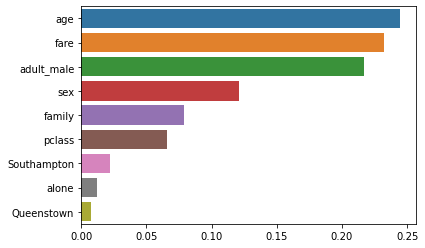

In [93]:
sns.barplot(x=vars_import, y=vars_import.index)
plt.show()

In [94]:
var_non_import=['Queenstown']
x_train_up=x_train_up.drop(var_non_import, axis=1)
x_val=x_val.drop(var_non_import, axis=1)
x_test=x_test.drop(var_non_import, axis=1)

In [95]:
#Régression logistic
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as GSCV
model2=LR(random_state=seed, max_iter=500)
hyper_LR={'C':[0.001, 0.01, 0.1, 1, 10, 100]}
model2_cv=GSCV(model2, hyper_LR, cv=5)
model2_cv.fit(x_train_up, y_train_up)

print(model2_cv.best_score_)
print(model2_cv.best_estimator_)

0.8298288225769141
LogisticRegression(C=10, max_iter=500, random_state=111)


In [96]:
#Foret aléatoire
model3=RFC(random_state=seed)
hyper_RF={'n_estimators':[5, 10, 20, 50, 100, 200],
         'max_depth':[None, 2, 5, 10, 15, 20]}

model3_cv=GSCV(model3, hyper_RF, cv=5)
model3_cv.fit(x_train_up, y_train_up)
print(model3_cv.best_score_)
print(model3_cv.best_estimator_)

0.878498727735369
RandomForestClassifier(max_depth=15, random_state=111)


In [97]:
#SVM
from sklearn.svm import SVC
model4=SVC(random_state=seed)
hyper_svm={'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}
model4_cv=GSCV(model4, hyper_svm, cv=5)
model4_cv.fit(x_train_up, y_train_up)
print(model4_cv.best_score_)
print(model4_cv.best_estimator_)

0.823768216516308
SVC(C=1, kernel='linear', random_state=111)


In [98]:
#Bagging Classifier 

In [99]:
from sklearn.ensemble import BaggingClassifier as BC
model5=BC(random_state=seed)
hyper_BC={'n_estimators':[5, 10, 20, 50, 100, 200]}

model5_cv=GSCV(model5, hyper_BC, cv=5)
model5_cv.fit(x_train_up, y_train_up)
print(model5_cv.best_score_)
print(model5_cv.best_estimator_)

0.8693615544760582
BaggingClassifier(n_estimators=20, random_state=111)


# Evaluation des performances et choix du modèle

In [100]:
def evaluation_model(model, features, labels):
    pred=model.predict(features)
    score=accuracy_score(y_val, pred)
    print('score global du model', round(score, 3))

In [101]:
models=[model2_cv.best_estimator_, model3_cv.best_estimator_, model4_cv.best_estimator_, model5_cv.best_estimator_ ]
for mod in models:
    print("Modèle " + str(mod))
    evaluation_model(mod, x_val, y_val)
    print('-'*90)

Modèle LogisticRegression(C=10, max_iter=500, random_state=111)
score global du model 0.764
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(max_depth=15, random_state=111)
score global du model 0.736
------------------------------------------------------------------------------------------
Modèle SVC(C=1, kernel='linear', random_state=111)
score global du model 0.781
------------------------------------------------------------------------------------------
Modèle BaggingClassifier(n_estimators=20, random_state=111)
score global du model 0.736
------------------------------------------------------------------------------------------


In [106]:
#Performance du meilleur modèle sur les données test
accuracy_score(y_test, model5_cv.best_estimator_.predict(x_test))

0.8044692737430168